In [1]:
import sys
src_path = r"/Users/mihai/Documents/School/TUDelft/DeepLearning/IIC"
if src_path not in sys.path:
    sys.path.append(src_path)
_ = [print(pth) for pth in sys.path]

/Users/mihai/Documents/School/TUDelft/DeepLearning/IIC/src/notebooks
/Users/mihai/opt/anaconda3/envs/iic/lib/python37.zip
/Users/mihai/opt/anaconda3/envs/iic/lib/python3.7
/Users/mihai/opt/anaconda3/envs/iic/lib/python3.7/lib-dynload

/Users/mihai/.local/lib/python3.7/site-packages
/Users/mihai/opt/anaconda3/envs/iic/lib/python3.7/site-packages
/Users/mihai/opt/anaconda3/envs/iic/lib/python3.7/site-packages/IPython/extensions
/Users/mihai/.ipython
/Users/mihai/Documents/School/TUDelft/DeepLearning/IIC


In [150]:
import torch
import argparse
import src.archs as archs
from src.utils.cluster.transforms import sobel_process
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchvision.transforms import InterpolationMode

In [3]:
class Config:
    batchnorm_track = True
    output_k_A = 15
    output_k_B = 3
    arch = 'SegmentationNet10aTwoHead'
    input_sz = 128
    num_sub_heads = 1
    in_channels = 5
    
config = Config()

## Loading the model

In [84]:
model_path = '/Users/mihai/Documents/School/TUDelft/DeepLearning/IIC/out/555/best_net.pytorch'
net = archs.__dict__[config.arch](config)

In [90]:
dict = torch.load(model_path, map_location=lambda storage, loc: storage)

In [91]:
net.load_state_dict(dict)

<All keys matched successfully>

In [92]:
colors = {
    0 : torch.tensor([0.9, 0, 0, 1]),
    1 : torch.tensor([0, 0.9, 0, 1]),
    2 : torch.tensor([0, 0, 0.9, 1])
}

## Input data

In [185]:
data_dir = '/Users/mihai/Documents/School/TUDelft/DeepLearning/IIC/datasets/cocostuff-data/images/'
transform = transforms.Compose([
    transforms.Resize(255),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)
images, labels = next(iter(dataloader))


In [186]:
images = F.pad(input=images, pad=(0,0,0,0,0,1,0,0), mode='constant', value=0) # making them rgba

In [187]:
images[30].shape

torch.Size([4, 224, 224])

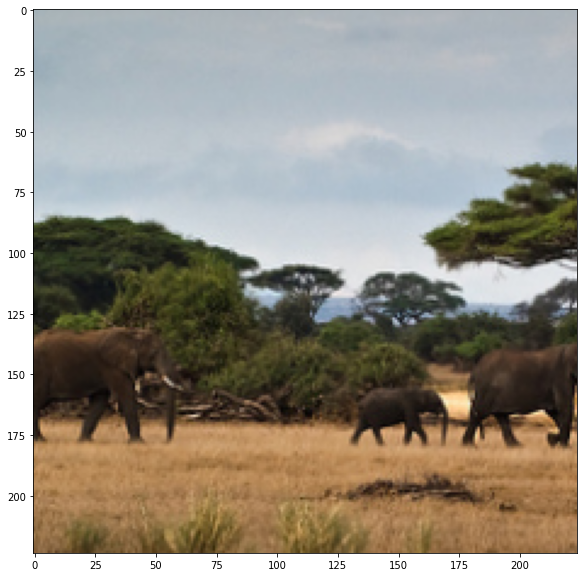

In [203]:
plt.imshow(images[114][[0,1,2], :, :].permute(1, 2, 0))
plt.show()

In [205]:
x = sobel_process(images, True)

In [206]:
x.shape

torch.Size([128, 5, 224, 224])

In [207]:
y = net(x[114:115], head="B")
out_imgs = torch.zeros(len(y[0]), 4, 128, 128)

In [208]:
classes = torch.argmax(y[0], dim=1)

for batch in range(len(classes)):
    for i in range(128):
        for j in range(128):
            out_imgs[batch, :, i, j] = colors[classes[batch, i, j].item()]

In [209]:
out_imgs.shape

torch.Size([1, 4, 128, 128])

In [210]:
y[0].shape

torch.Size([1, 3, 128, 128])

In [211]:
classes.shape

torch.Size([1, 128, 128])

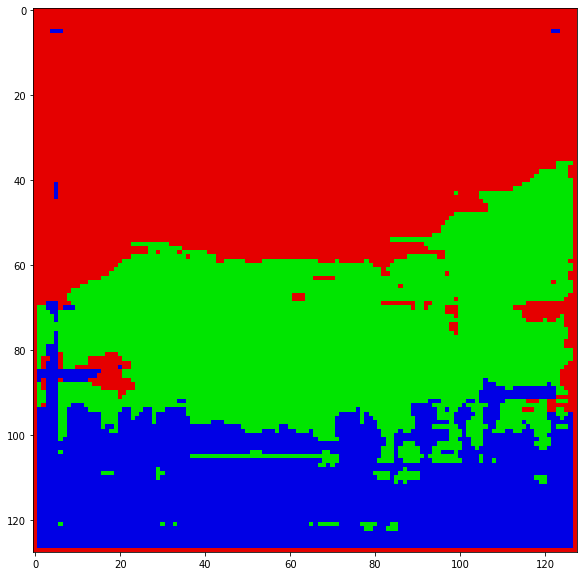

In [212]:
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(out_imgs[0].permute(1, 2, 0))
plt.show()